In [1]:
import pandas as pd
data=pd.read_csv('C:\\Users\\amitk\\OneDrive\\Desktop\\ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
data.shape

(89992, 3)

In [3]:
from scipy.sparse import csr_matrix
adjacency_matrix =csr_matrix((data.rating.values, (data.user_id.values,data.item_id.values)))

In [4]:
adjacency_matrix.shape

(943, 1681)

In [5]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

In [6]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


In [7]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
from sklearn.utils.extmath import randomized_svd
import numpy as np 
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=10,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 10)
(10,)
(1681, 10)


In [8]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    avg_rating=ratings.mean()

    return avg_rating

In [9]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

In [10]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    inta=np.zeros(dim)
    return inta

In [11]:
dim=943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [12]:
dim=1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

In [13]:
def grader_dim(b_i,c_j):
    assert(len(b_i)==943 and np.sum(b_i)==0)
    assert(len(c_j)==1681 and np.sum(c_j)==0)
    return True
grader_dim(b_i,c_j)

True

In [14]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    reg=2*alpha*b_i[user_id]
    loss=-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    der=reg+loss
    return der

In [15]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

In [16]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    reg=2*alpha*c_j[item_id]
    loss=-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    der=reg+loss
    return der

In [17]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

In [18]:
from sklearn.metrics import mean_squared_error
rate=.01
y_act=data["rating"]
epochs=[]
mse=[]
for epoch in range(30):
  epochs.append(epoch+1)
  y_pred=[]
  for user,item,rating in zip(data.iloc[:, 0], data.iloc[:, 1],data.iloc[:, 2]):
    d_b=derivative_db(user,item,rating,U,VT,mu,alpha)
    b_i[user]=b_i[user]-rate*d_b 
    d_c=derivative_dc(user,item,rating,U,VT,mu,alpha)
    c_j[item]=c_j[item]-rate*d_c  
  for user,item,rating in zip(data.iloc[:, 0], data.iloc[:, 1],data.iloc[:, 2]):
    pred=mu+b_i[user]+c_j[item]+np.dot(U[user],VT.T[item])
    y_pred.append(pred)
  m= mean_squared_error(y_act,y_pred)
  mse.append(m) 
  print("--"+" "+ "EPOCH"+" "+str(epoch+1))  
  print("MSE :",m)

-- EPOCH 1
MSE : 0.8884177830632292
-- EPOCH 2
MSE : 0.8618657763635917
-- EPOCH 3
MSE : 0.8522564704097786
-- EPOCH 4
MSE : 0.8476517968683716
-- EPOCH 5
MSE : 0.8450700324375263
-- EPOCH 6
MSE : 0.8434569520565145
-- EPOCH 7
MSE : 0.8423646215256323
-- EPOCH 8
MSE : 0.8415779416176522
-- EPOCH 9
MSE : 0.8409837723487883
-- EPOCH 10
MSE : 0.840518097134755
-- EPOCH 11
MSE : 0.840142408569064
-- EPOCH 12
MSE : 0.8398322960156199
-- EPOCH 13
MSE : 0.8395715677685543
-- EPOCH 14
MSE : 0.839349055268564
-- EPOCH 15
MSE : 0.8391567909740344
-- EPOCH 16
MSE : 0.8389889243459856
-- EPOCH 17
MSE : 0.838841051746987
-- EPOCH 18
MSE : 0.8387097875887763
-- EPOCH 19
MSE : 0.8385924811326955
-- EPOCH 20
MSE : 0.8384870241105183
-- EPOCH 21
MSE : 0.8383917166744568
-- EPOCH 22
MSE : 0.8383051718362824
-- EPOCH 23
MSE : 0.8382262459394156
-- EPOCH 24
MSE : 0.8381539871401772
-- EPOCH 25
MSE : 0.8380875966055453
-- EPOCH 26
MSE : 0.8380263988590071
-- EPOCH 27
MSE : 0.8379698188196685
-- EPOCH 28
MS

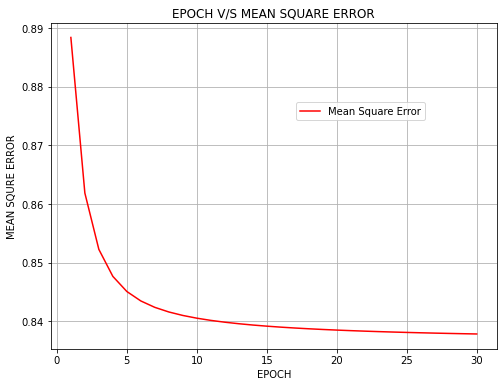

In [19]:
import matplotlib.pyplot as plt
x=epochs
y=mse
plt.figure(figsize=(8,6))
plt.plot(x,y,label='Mean Square Error',color="red")
plt.grid()
plt.xlabel("EPOCH")
plt.ylabel("MEAN SQURE ERROR")
plt.title("EPOCH V/S MEAN SQUARE ERROR")
plt.legend(loc=(.55,.7))

In [47]:
import pandas as pd
data1=pd.read_csv('C:\\Users\\amitk\\OneDrive\\Desktop\\user_info.csv')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [48]:
X=U
Y=data1["is_male"]

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e-4)

In [50]:
logreg.fit(X,Y)

LogisticRegression(C=0.0001)

In [51]:
 from sklearn.metrics import accuracy_score
accuracy_score(Y,logreg.predict(X) )

0.7104984093319194

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,logreg.predict(X))

array([[  0, 273],
       [  0, 670]], dtype=int64)